## Linear Regression

* Basis of many more recent and complex learning methods
* Quantitative response as a linear function of one or more predictors
    - Linear function:
        - f(a + b) = f(a) + f(b)
        - f(ca) = cf(a)
* Explain the relationship between response and predictor(s)? 
* Simple Linear Regression
    - One quantitative predictor
* Multivariate Regression
    - Two or more predictors
    - Quantitative or categorical predictors



### Simple Linear Regression

* Dependent variable (response, outcome variable) y is a function of a single independent (feature, predictor) variable x
* y = mx + b, where m is the slope and b is the intercept
    - $y,x,b \in R$
* Does y increase or decrease as x increases or decreases and by how much?


In [14]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
cars = pd.read_csv('cars.csv')
cars.tail()
#
# dist is the distance required for the car to stop as a function of the speed of the car

speed  dist
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85

#### Plot relationship

Text(0, 0.5, 'Distance')

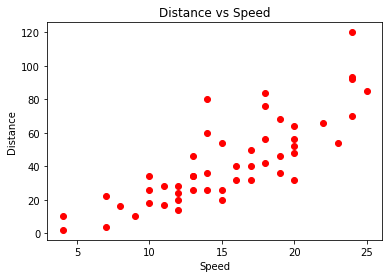

In [3]:
plt.scatter(cars.speed, cars.dist, color = 'red')
plt.title('Distance vs Speed')
plt.xlabel('Speed')
plt.ylabel('Distance')

### Hypothesis about relationship in population

#### Linear Model

* Dependent variable y (distance) is a linear function of the independent variable x (speed)

<div style="font-size: 125%;">
$$ y = b_0 + b_1*x$$
</div>

y is the dependent variable  
x is the independent variable  
$b_0$ is the intercept  
$b_1$ is the slope

* In nature no relationship is perfectly linear,so

<div style="font-size: 125%;">
$$ y = b_0 + b_1*x + \epsilon$$
</div>

$\epsilon$ is the error term


### What is best fitting line?

* The line with the smallest error
* We want to fit the linear regression model to the data, to estimate the values of the coefficients that minimizes the error

<div style="font-size: 125%;">
$$\hat{y_i} = \hat{b}_0 + \hat{b}_1x_i$$
</div>

* $x_i$ is the ith value of the predictor
* $\hat{y_i}$ is the predicted response (or fitted value) for observation i
* $\hat{b}_0$ is an estimate of the intercept
* $\hat{b}_1$ is an estimate of the slope



#### sklearn.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Create arrays from data frame

In [16]:
X = cars.speed
y = cars.dist.values
X = X.values.reshape(50,1)

#### Create linear model and fit to data

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f'Intercept: {model.intercept_} Slope: {model.coef_[0]} ') # output is b0 and b1

Intercept: -17.57909489051095 Slope: 3.9324087591240873 


#### Predict new points

In [18]:
new = np.array([13.5,21]) # two x values 
predictions = model.predict(new.reshape(-1,1)) # Model fitted to 2-d array
predictions # given b0 and b1, what is y(distance) for the two new x values

array([35.50842336, 65.00148905])

Text(0, 0.5, 'Distance')

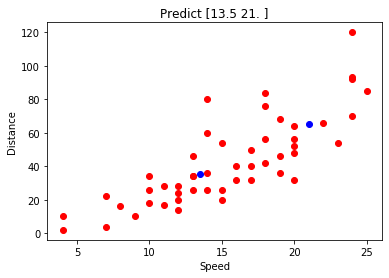

In [19]:
# plot all data points with the two new values
plt.scatter(X, y, color = 'red')
plt.plot(new,predictions,'bo')
plt.title(f'Predict {new}')
plt.xlabel('Speed')
plt.ylabel('Distance')

#### Residuals: Difference between actual response value $y_i$ and fitted value $\hat{y}$

<div style="font-size: 125%;">
$$e_i = y_i - \hat{y_i}$$
</div> 

* Best fitting line is one that makes this prediction error "as small as possible" 
* One way is to minimize the sum of the squared prediction errors: Orindary Least Squares method 
* Find $b_0$ and $b_1$ that minimizes 

<div style="font-size: 125%;">
$$RSS = \sum{e^2_i} = \sum{(y_i - \hat{y_i})^2} = \sum{(y_i - b_0 + b_1x_i)^2}$$
</div>

 * RSS is called the Residual Sum of Squares

#### Predict each value of independent variable using fitted model

In [20]:
yhat = model.predict(X) # find fitted values by the model for all the actual X values 

Text(0, 0.5, 'Distance')

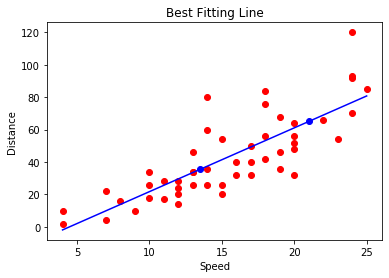

In [21]:
# plot all the fitted values in blue and actual values in red. two blue dots are the new x values we added later
plt.scatter(X, y, color = 'red')
plt.plot(X, yhat, color = 'blue')
plt.plot(new,predictions,'bo')
plt.title('Best Fitting Line')
plt.xlabel('Speed')
plt.ylabel('Distance')

#### Plot Residuals

In [22]:
# show residuals, this is the error between actual and predicted
plt.scatter(X, y, color = 'red')
plt.plot(X, yhat, color = 'blue')
plt.title('Residuals')
plt.xlabel('Speed')
plt.ylabel('Distance')
for i in range(len(yhat)):
    x1 = X[i]
    x2 = x1
    y1 = yhat[i]
    y2 = y[i]
    plt.plot([x1,x2],[y1,y2],'g-')
plt.show()

##### Why squared error?
 
* Distance measure
* Smooth function, differentable

#### Least squares estimate for the coefficients $b_0$ and $b_1$
 
* Take the partial derivative with respect to $b_1$, set it to 0 and solve for $b_1$

<div style="font-size: 125%;">

$$\frac{\partial(RSS)}{\partial(b_1)} = 0$$$$b_1 = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^n_{i=1}(x_i-\bar{x})^2}$$

$$b_0 = \bar{y} - b_1\bar{x}$$
</div>

$\bar{x}$ - mean of x  
$\bar{y}$ - mean of y

### Interpreting the coefficients
 
* $b_0$: the value of the response when the predictor is equal to 0
* $b_1$: the amount(in $b_1$ units) that the mean response will increase or decrease by for every one unit increase in x.

#### What to $b_0$ and $b_1$ estimate?

* Population Mean
* Will get a different estimate with a different sample


### Assumptions of Least Squares
 
* **Linear** relationship between response and predictor variables
* Error terms are **Independent**
* The error term is **Normally distributed** $N(0,\sigma^2)$
* Homoscedasticity: **Equal** variance of the error term
* Under these assumptions, the Method of Least Squares is the Maximum Likelihood Estimate (MLE)


 #### Maximum Likelihood Estimates
<div style="font-size: 125%;"> 
$$P(Data | \hat{\beta}_0,\hat{\beta}_1)$$
</div>
* Method for computing the "best" parameter estimates from the data
* Given the data and the linear model, find $b_0 = \hat{\beta}_0$ and $b_1 = \hat{\beta}_1$ that make the data most likely
    

### Accessing the accuracy of the model

 * Goodness of fit

####  R-squared (coefficient of determination) 
 
* Fraction of the total variance in y explained by the total variation in x
* A number between 0 and 1 (i.e. independent of the scale of Y)
* $R^2$ close to 1 means a large proportion of the variance in the response is explained by the regression
* $R^2$ close to 0 means that not much of the variance is explained: wrong model, inherently high variance or both 
* Residual Sum of Squares (RSS): squared difference of actual response value and fitted values
* Total Sum of Squares (TSS): squared difference of actual response value and mean response value.

<div style="font-size: 125%;"> 
$$R^2 = \frac{TSS - RSS}{RSS} = 1 - \frac{RSS}{TSS}$$
$$TSS = \sum^n_{i=1}(y_i-\bar{y})^2$$
</div>

The functions below shows how to compute RSS, $R^2$, and TSS without calling sklearn functions.  

In [23]:
# this defines Residual Sum of Squares (RSS)
def rss(y,yhat):
    return(np.sum((y - yhat)**2))

In [24]:
# this defines Total Sum of Squares (TSS)
def tss(y):
    return(np.sum((y - np.mean(y))**2))

# this defines coefficient of determination)
def R_squared(y,yhat):
    return(1 - (rss(y,yhat)/tss(y)))

R_squared(y,yhat)

0.6510793807582509

#### R-squared from model - Compute the $R^2$ for our model

In [15]:
model.score(X,y) # call the standard function that returns the coefficient of determination R^2 of the prediction.
# output matches with our previous calculation. 

0.6510793807582509

* For a single predictor, R-squared is equal to Pearson's Correlation squared
<div style="font-size: 125%;"> 
$$R^2 = r^2$$
</div> 

In [25]:
r = stats.pearsonr(X[:,0],y)[0]
r**2
# another way to find R^2, but only works when you have single predictor, just one dependent variable 

0.651079380758251

#### Mean Squared Error

* The average of the squared error (i.e. residuals)

$$MSE = \frac{1}{n}\sum(y - \hat{y})^2$$

* Root Mean Squared Error
    - Same unit as response variable

$$RMSE = \sqrt{\frac{1}{n}\sum(y - \hat{y})^2}$$

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. 

The smaller the means squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error. 

https://www.statisticshowto.com/mean-squared-error/

In [26]:
def mse(y,yhat):
    return np.mean((y - yhat)**2)

def rmse(y,yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [32]:
# compute and output using our own functions
print(mse(y,yhat))
print(rmse(y, yhat))


227.07042102189777
15.068855995791377


In [29]:
# compute and output using sklearn function 
from sklearn.metrics import mean_squared_error
mean_squared_error(y, yhat)
# http://statweb.stanford.edu/~susan/courses/s60/split/node60.html

227.07042102189777

Well, probably not a good fit! 